<a href="https://colab.research.google.com/github/agustinsilva447/Fisica-de-los-Semiconductores/blob/main/3_1d_schrodinger_eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                          # librería para manipular vectores y matrices
import matplotlib.pyplot as plt             # librería para realizar gráficos
from scipy.linalg import eigh_tridiagonal   # librería con algoritmos matemáticos

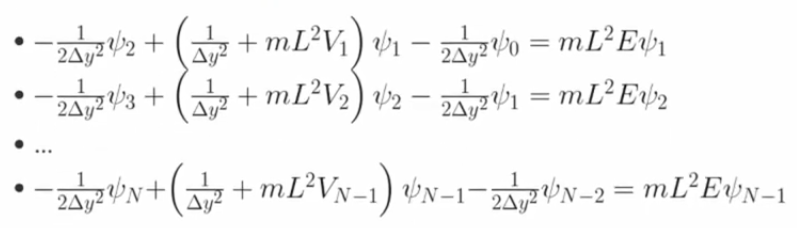

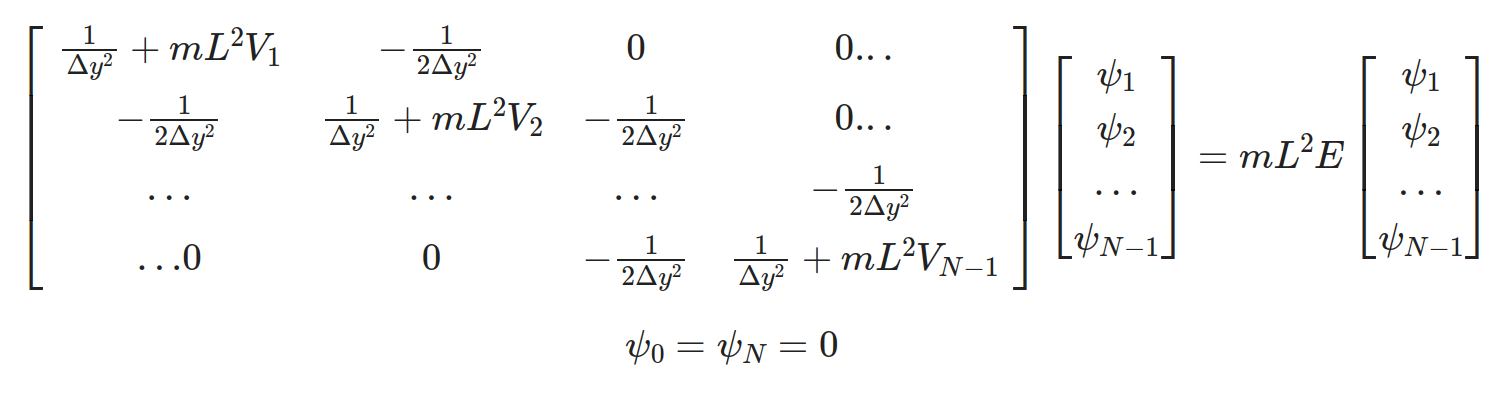

In [2]:
N = 1000                      # Largo del potencial
dy = 1/N                      # Salto en distancia para la derivada
y = np.linspace(0, 1, N+1)    # Vector espacial

In [3]:
def tren_pulsos(p,e):
  V = np.zeros(len(y))
  c = 0
  for i in range(len(y)):
    if c < p:
      V[i] = 0
      c += 1
    elif c < 2*p:
      V[i] = e
      c += 1
    else:
      c = 0
      V[i] = e
  return V

def escalon(p,e):
  V = np.zeros(len(y))
  c = 0
  for i in range(len(y)):
    if c < p:
      V[i] = 0
      c += 1
    else:
      V[i] = e
  return V


def mL2V(y):
  p = 500
  e = 1000
  #return tren_pulsos(p,e)                    # Tren de pulsos     (p = periodo sobre 2 del pulso, e = valor del potencial)
  return escalon(p,e)                        # Escalón            (p = comienzo del pulso,        e = valor del potencial)
  #return e * (y - p)**2                      # Oscilador armonico (p = valor central ,            e = proporcial al valor máximo del potencial)
  #return e * np.exp(-(y-p)**2/(2*0.05**2))   # Gauseana           (p = valor medio,               e = proporcial al valor máximo del potencial)

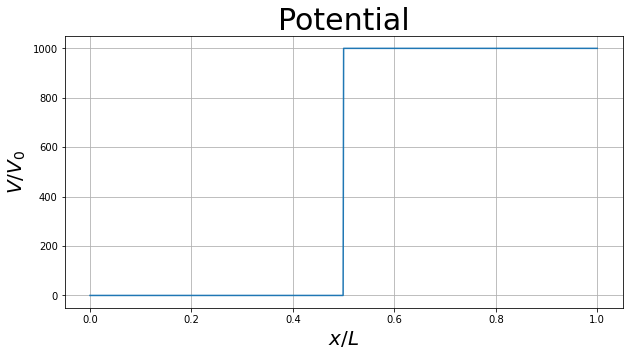

In [4]:
plt.figure(figsize=(10,5))
plt.plot(y, mL2V(y))
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$',  fontsize=20)
plt.xlabel('$x/L$',    fontsize=20)
plt.grid()
plt.plot()

plt.savefig('v3p1.png', dpi=200)

In [5]:
d =  (1)/(dy**2)   + mL2V(y)[1:-1]        # vector diagonal de la matriz
e = -(1)/(2*dy**2) * np.ones(len(d)-1)    # vectores consecutivos a la matriz tridiagonal

In [6]:
w, v = eigh_tridiagonal(d, e)             # encontrar los autovalores de la matriz tridiagonal

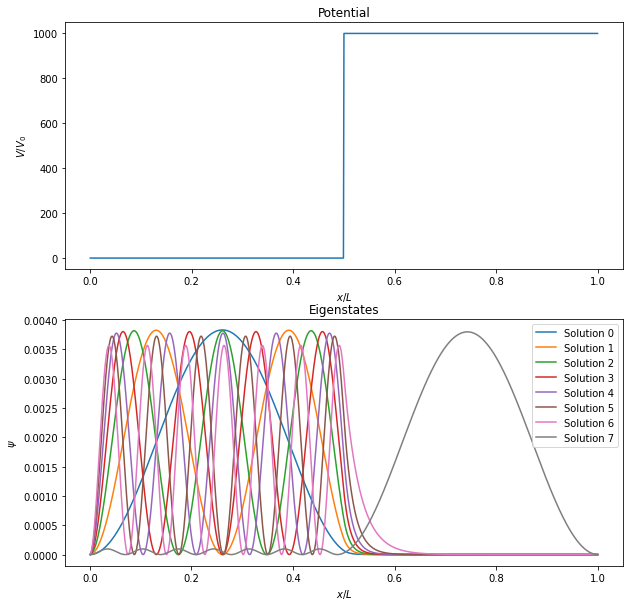

In [7]:
# graficar y guardar los gráficos de las soluciones de la ecuación de Schrodinger para distintos valores de energía

fig0, axs = plt.subplots(2,1,figsize=(10,10))

axs[0].plot(y, mL2V(y))
axs[0].set_title('Potential')
axs[0].set_ylabel('$V/V_0$')
axs[0].set_xlabel('$x/L$')

for i in range(8):
  axs[1].plot(y[1:-1], v.T[i]**2, label = "Solution {}".format(i))

axs[1].set_title('Eigenstates')
axs[1].set_ylabel('$\psi$')
axs[1].set_xlabel('$x/L$')
axs[1].legend()

plt.plot()
plt.savefig('v3p2.png', dpi=200)

[]

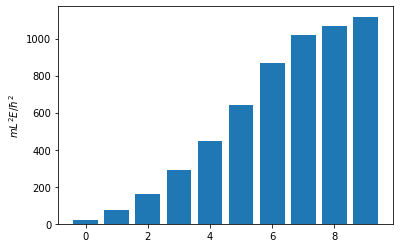

In [8]:
# graficar los distintos valores de energía para las distintas soluciones

plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$')
plt.plot()